In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from torchvision import models
from netlens.modules import FlatModel
from netlens.data import *
from netlens.image_proc import *
from netlens.visualization import OptVis, ImageParam

In [2]:
IMAGE_PATH = '../../images/examples/'

In [3]:
torch.__version__

'1.3.1'

In [4]:
network = models.vgg11(pretrained=True)
network.to('cuda' if torch.cuda.is_available() else 'cpu');

In [5]:
network

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [6]:
model = FlatModel.from_nested_cnn(network)

In [7]:
model.summary()

    # | LAYER                  | MODULE
--------------------------------------------------------------------------------
    0 | features-conv-0        | Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    1 | features-relu-0        | ReLU()
    2 | features-pool-0        | MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    3 | features-conv-1        | Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    4 | features-relu-1        | ReLU()
    5 | features-pool-1        | MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    6 | features-conv-2        | Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    7 | features-relu-2        | ReLU()
    8 | features-conv-3        | Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    9 | features-relu-3        | ReLU()
   10 | features-pool-2        | MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fa

## Class Visualisations

First we generate visualisations of the classes. To change the class selected, simply change the value of `neuron`.

We parameterise the input noise in the colour decorrelated, Fourier domain. This helps create better visualisations. For more, see: https://distill.pub/2017/feature-visualization/

In [8]:
# Select a layer from the network
layer = 'classifier-linear-2'
neuron = 360

# Create an OptVis object from a PyTorch model
optvis = OptVis.from_activations(model, layer=layer, neuron=neuron, 
                                 optim_params={'lr': 0.05, 'weight_decay': 5.0})

For layer classifier-linear-2, class 360: otter
Run [50], loss=-202.1137
Run [100], loss=-266.5935
Run [150], loss=-259.2683
Run [200], loss=-275.2614
Run [250], loss=-266.5912


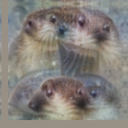

Run [300], loss=-287.9228
Run [350], loss=-287.5847
Run [400], loss=-292.4401
Run [450], loss=-273.2025
Run [500], loss=-307.4579


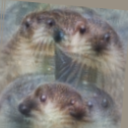

In [9]:
# Parameterise input noise in colour decorrelated Fourier domain
img_param = ImageParam(size=128, fft=True, decorrelate=True)

# Create visualisation
print(f'For layer {layer}, class {neuron}: {IMAGENET_LABELS[neuron]}')
output = optvis.vis(img_param, thresh=(250, 500), transform=True, verbose=True, show=True)

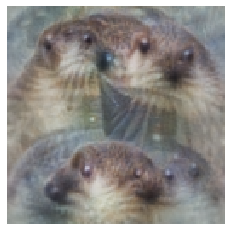

In [10]:
show_image(output)

## Channel Visualisations

In [11]:
model.summary()

    # | LAYER                  | MODULE
--------------------------------------------------------------------------------
    0 | features-conv-0        | Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    1 | features-relu-0        | ReLU()
    2 | features-pool-0        | MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    3 | features-conv-1        | Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    4 | features-relu-1        | ReLU()
    5 | features-pool-1        | MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    6 | features-conv-2        | Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    7 | features-relu-2        | ReLU()
    8 | features-conv-3        | Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    9 | features-relu-3        | ReLU()
   10 | features-pool-2        | MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fa

In [24]:
# Select a layer from the network
layer = 'features-conv-7'

# Choose a channel that is within the size of the layer
channel = 11

# Create an OptVis object from a PyTorch model
optvis = OptVis.from_activations(model, layer=layer, channel=channel, shortcut=True,
                                 optim_params={'lr': 0.05, 'weight_decay': 0.03})

Run [50], loss=-37.0119
Run [100], loss=-46.4182
Run [150], loss=-42.8456
Run [200], loss=-52.7854
Run [250], loss=-53.5123


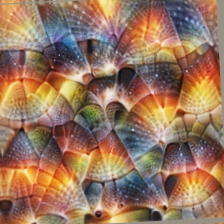

Run [300], loss=-52.4095
Run [350], loss=-49.6093
Run [400], loss=-51.2300
Run [450], loss=-51.6928
Run [500], loss=-47.7280


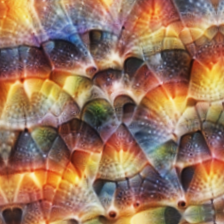

In [25]:
# Parameterise input noise in colour decorrelated Fourier domain
img_param = ImageParam(size=224, fft=True, decorrelate=True)

# Create visualisation
output = optvis.vis(img_param, thresh=(250, 500), transform=True, verbose=True, show=True)

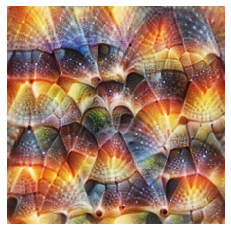

In [26]:
show_image(output)